In [ ]:
# Prep
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

IPMdir = "D:/Python/dsci2/IPM.csv"
RLSdir = "D:/Python/dsci2/RLS.csv"

In [ ]:
ipm_data = pd.read_csv(IPMdir)
rls_data = pd.read_csv(RLSdir)

# Replacing commas with periods
ipmfix = ['IPM 2019', 'IPM 2020', 'IPM 2021', 'IPM 2022', 'IPM 2023']
for i in ipmfix:
    ipm_data[i] = pd.to_numeric(ipm_data[i].astype(str).str.replace(',', '.'))

# Create 'Tahun' column for the years
ipm_clean = ipm_data.melt(id_vars='Provinsi',
                          value_vars=[column for column in ipm_data.columns if column.startswith('IPM')],
                          var_name='IPM_Tahun',
                          value_name='IPM')   

ipm_clean['Tahun'] = ipm_clean['IPM_Tahun'].str.extract(r'(\d{4})').astype(int)


rls_clean = rls_data.melt(id_vars='Provinsi',
                          value_vars=[column for column in rls_data.columns if column.startswith("RLS")],
                          var_name='RLS_Tahun',
                          value_name='RLS')

rls_clean['Tahun'] = rls_clean['RLS_Tahun'].str.extract(r'(\d{4})').astype(int)


In [ ]:
# Merging IPM data and RLS data
df_merged = pd.merge(rls_clean[['Provinsi', 'Tahun', 'RLS']],
                     ipm_clean[['Provinsi', 'Tahun', 'IPM']],
                     on=['Provinsi', 'Tahun'])

In [ ]:
# Checking out raw values correlation with pearson
df_merged[['IPM', 'RLS']].corr(method= 'pearson')

,IPM,RLS
IPM,1.000000,0.697287
RLS,0.697287,1.000000


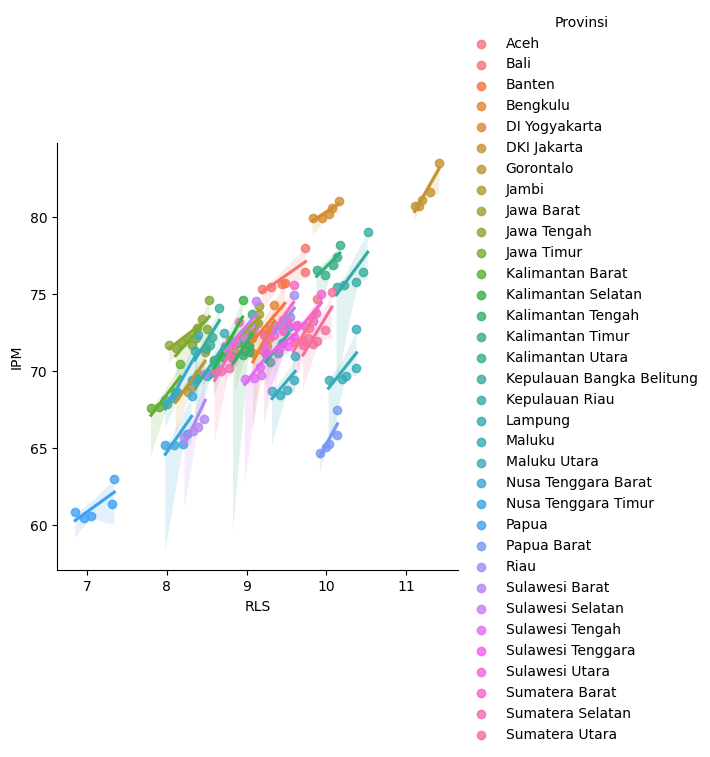

In [ ]:
# Visulaization using Seaborn
sns.lmplot(data=df_merged, x='RLS', y='IPM', hue='Provinsi')

In [ ]:
# Calculating year on year changes
df_merged = df_merged.sort_values(by=['Provinsi', 'Tahun'])
df_merged['IPM_growth'] = df_merged.groupby('Provinsi')['IPM'].pct_change()
df_merged['RLS_growth'] = df_merged.groupby('Provinsi')['RLS'].pct_change()
df_growth = df_merged.dropna(subset=['IPM_growth', 'RLS_growth'])

df_growth[['IPM_growth', 'RLS_growth']].corr(method='pearson')

,IPM_growth,RLS_growth
IPM_growth,1.00000,-0.29678
RLS_growth,-0.29678,1.00000


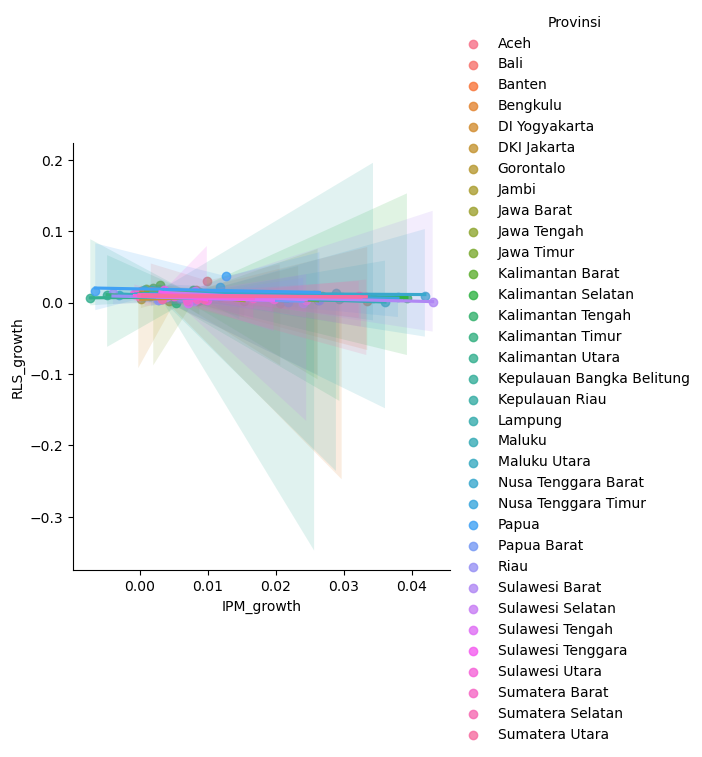

In [ ]:
# Plot
sns.lmplot(data=df_growth, x='IPM_growth', y='RLS_growth', hue='Provinsi')

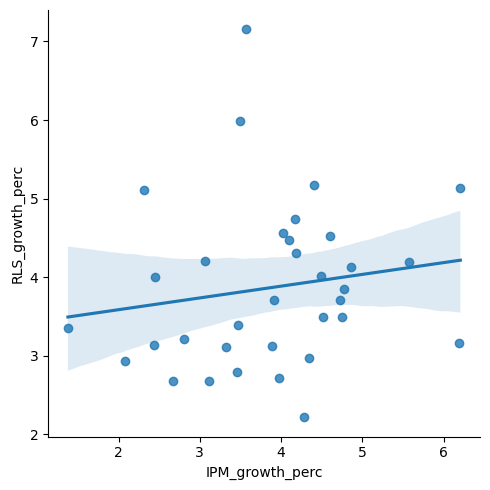

In [ ]:
# Calculting the 5-year growth percentage, then visualizing it
df_merged['RLS_growth_perc'] = (((rls_data['RLS 2023'] - rls_data['RLS 2019']) / rls_data['RLS 2019']) * 100)
df_merged['IPM_growth_perc'] = (((ipm_data['IPM 2023'] - ipm_data['IPM 2019']) / ipm_data['IPM 2019']) * 100)
df_merged.to_csv('Check.csv', index=False)

df_merged[['IPM_growth_perc', 'RLS_growth_perc']].corr(method='pearson')
sns.lmplot(data=df_merged, x='IPM_growth_perc', y='RLS_growth_perc')